<h1 style="text-align: center;">Target Construction</h1>


# 1. Setup & Loading Data

This notebook defines and constructs the target variables for our predictive modeling. We focus on creating signals such as `y_high` and `y_low` that capture the key outcomes of interest.

In [1]:
import os
from pathlib import Path

repo_root = Path.cwd()

while not (repo_root / ".git").exists() and repo_root.parent != repo_root:
    repo_root = repo_root.parent

os.chdir(repo_root)
print(f"Current working directory set to: {repo_root}")

Current working directory set to: c:\Users\Lenovo\Desktop\Git Uploads\cross-currency-extrema-forecasting


In [2]:
import pandas as pd
from src.data.target_engineering import CrossCurrencyLabeler, LabelingVisualizer


# Load your dataframe
df = pd.read_parquet("data/processed/clean_data.praquet")

# 2. Computing Labels

Using our cleaned multi-currency OHLCV data, we set next-hour max high `y_high` and min low `y_low` values for each currency $C$ as primary regression targets:

$$
Y^C_{high,t} = \max_{t\leq k \leq t+60}(H^C_k)\\
Y^C_{low,t} = \min_{t\leq k \leq t+60}(L^C_k)
$$

Where $L^C_t$ and $H^C_t$ are resp. the **low** and **high** prices of the currency $C$.

In [3]:
labeler = CrossCurrencyLabeler(df)

df_labeled: pd.DataFrame = labeler.run_labeling_pipeline()

🚀 Running labeling pipeline...
✅ Vertical-barrier regression labels created.
✅ Labeling pipeline complete.


# 3. Data Visualization & Sanity Check

We performed sanity checks to ensure the correctness and consistency of our target labels:

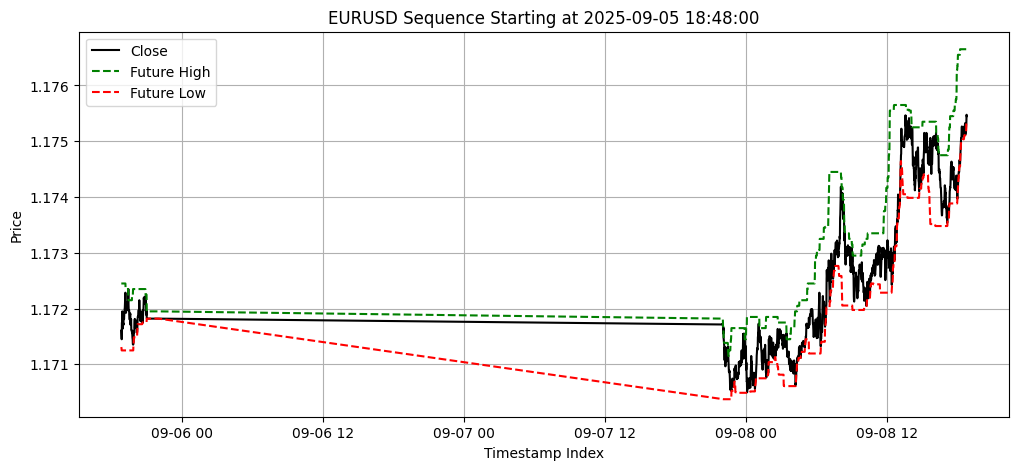

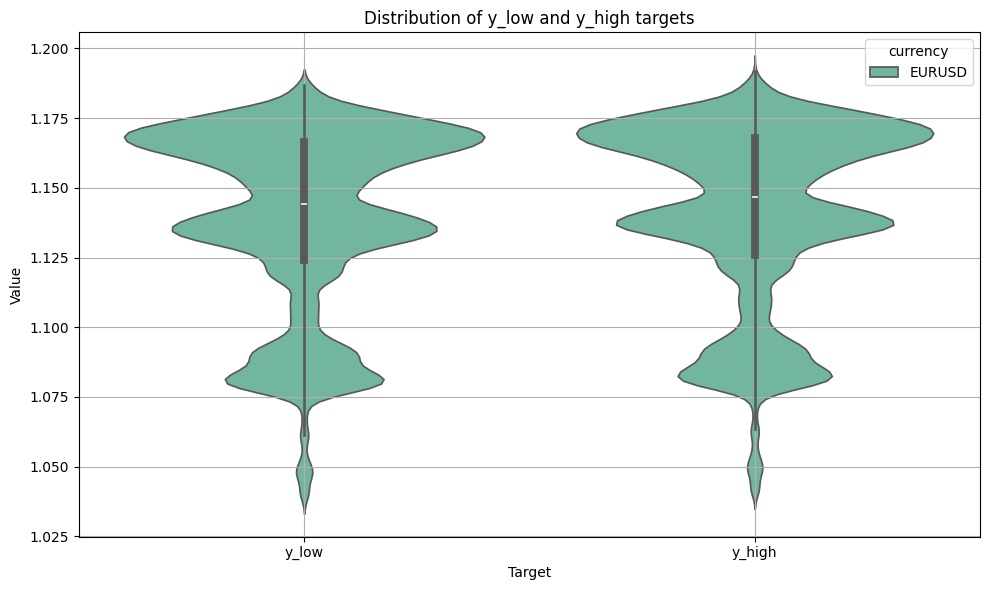

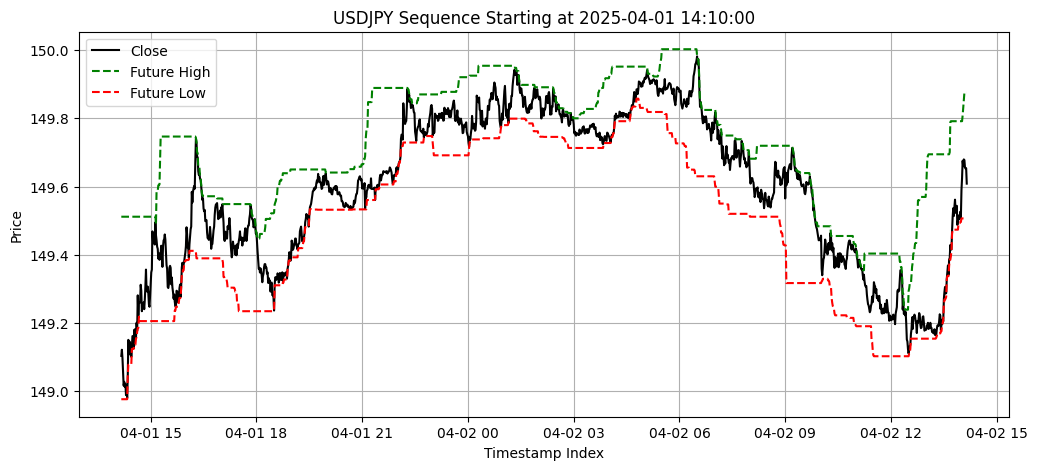

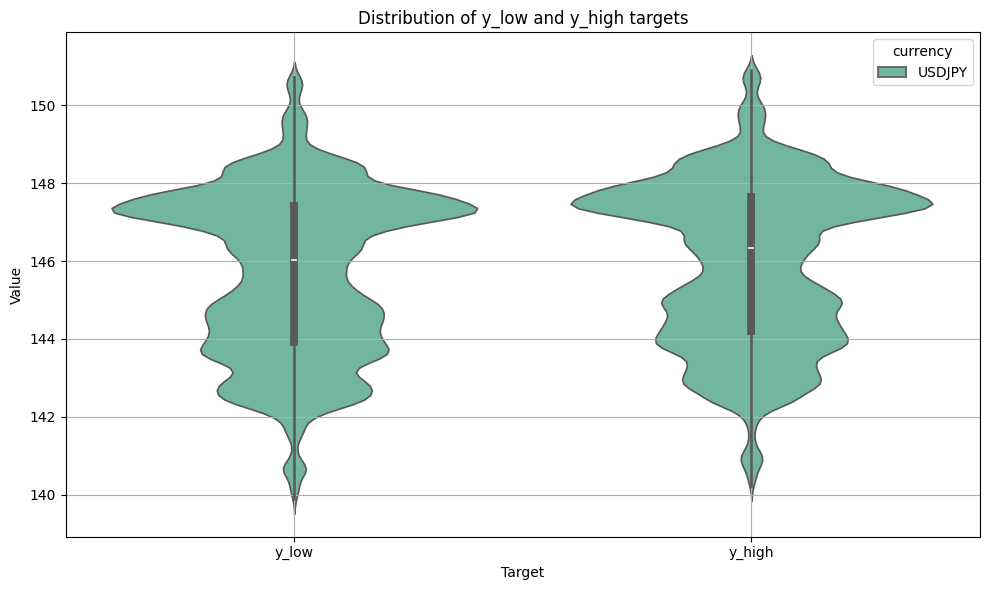

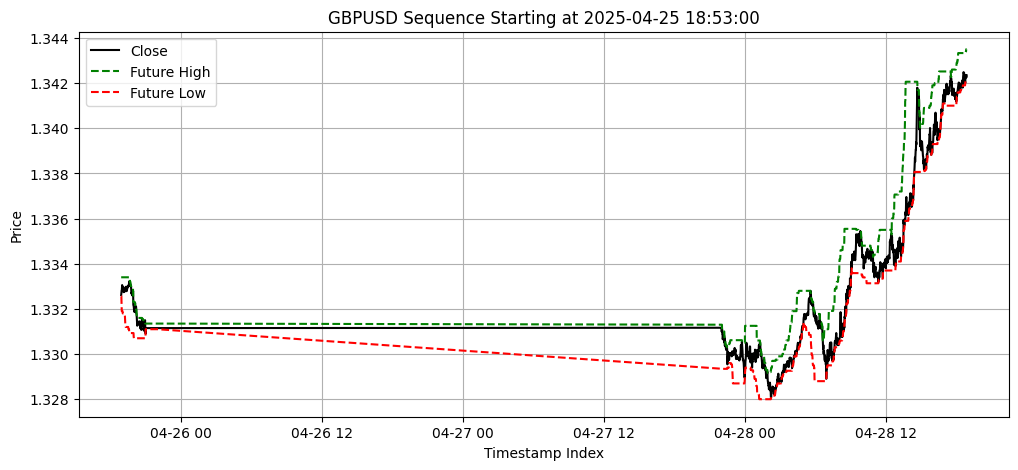

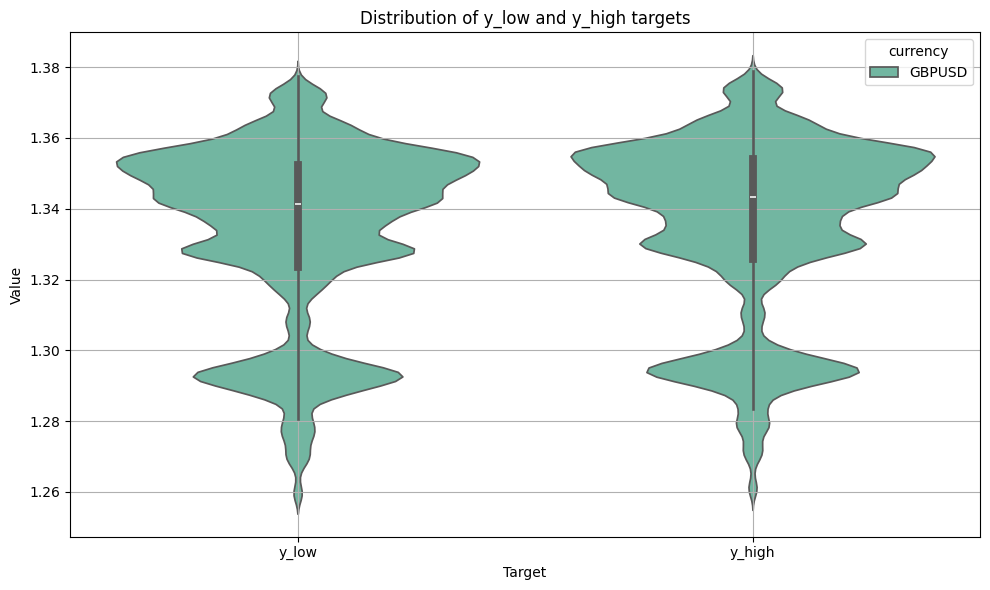

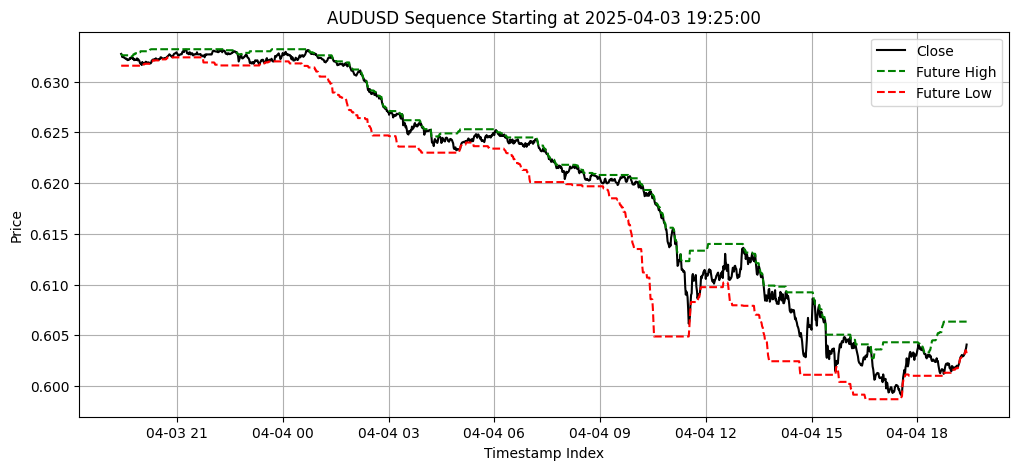

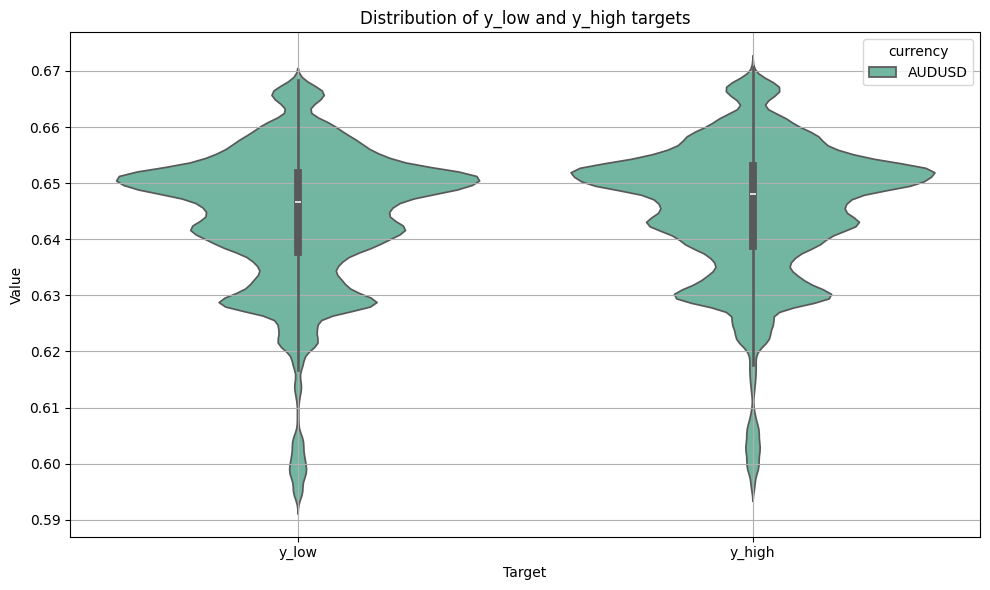

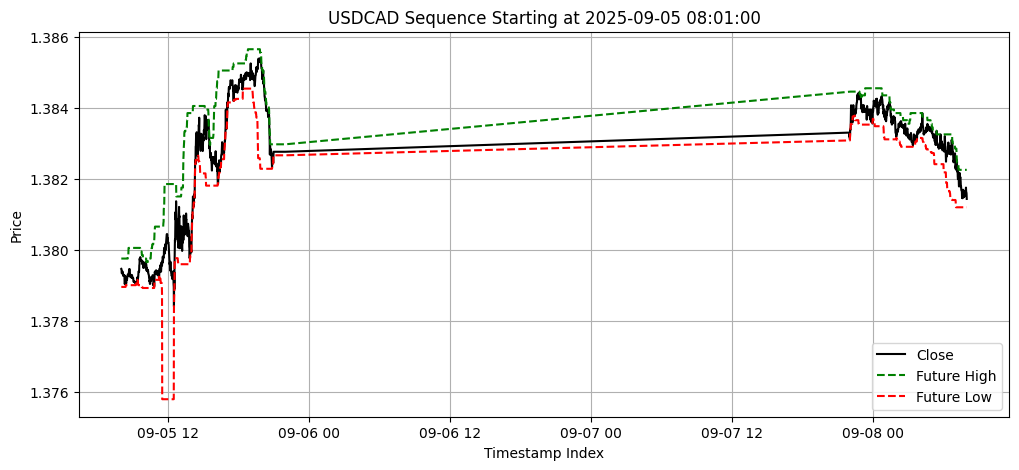

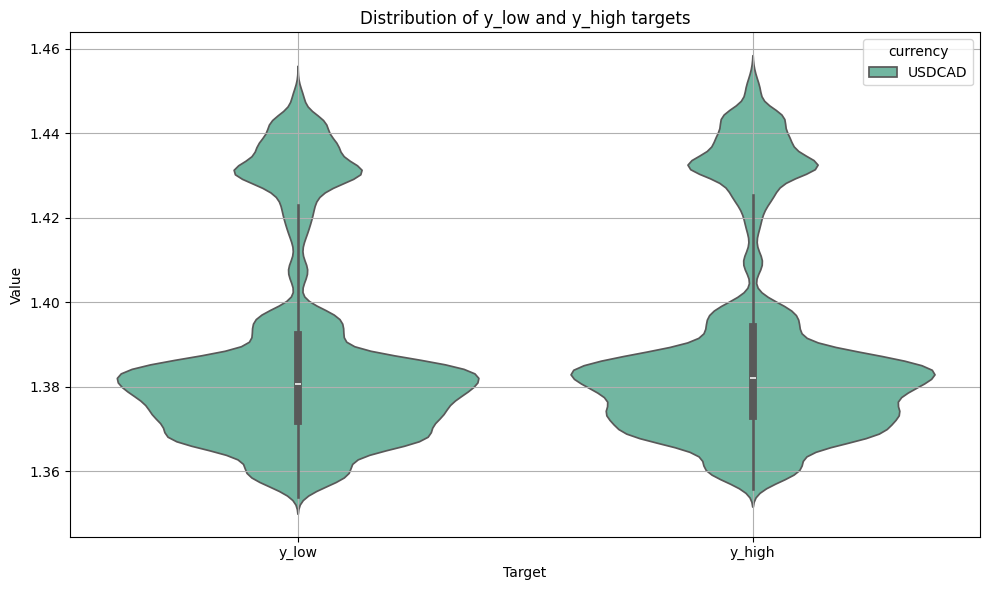

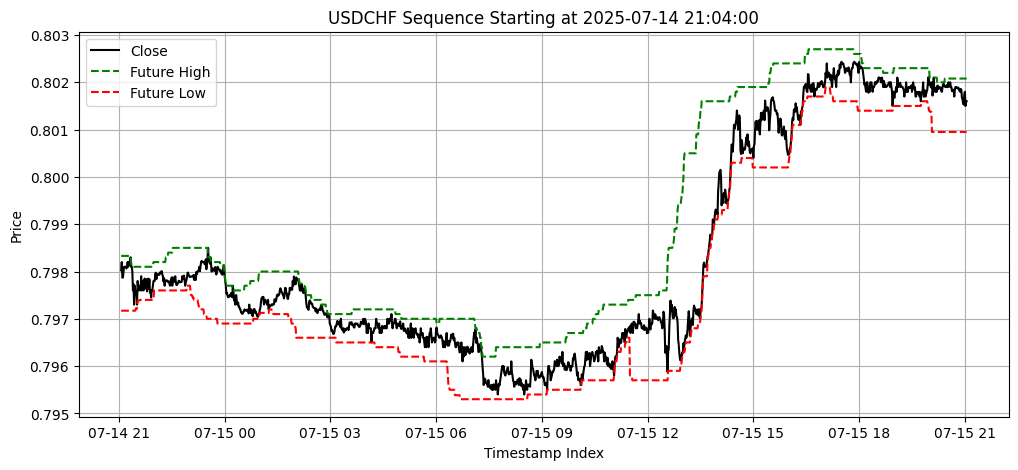

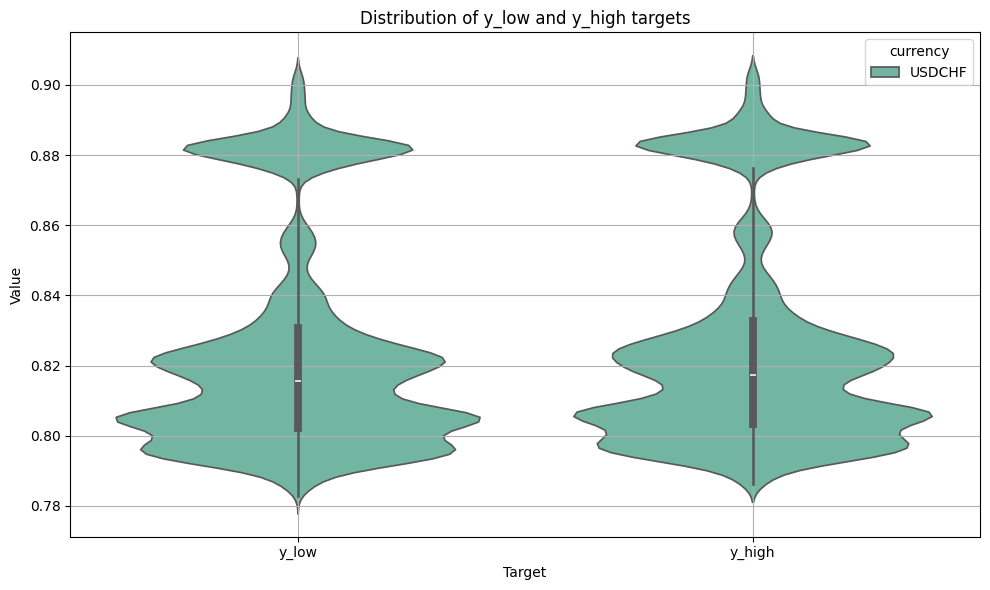

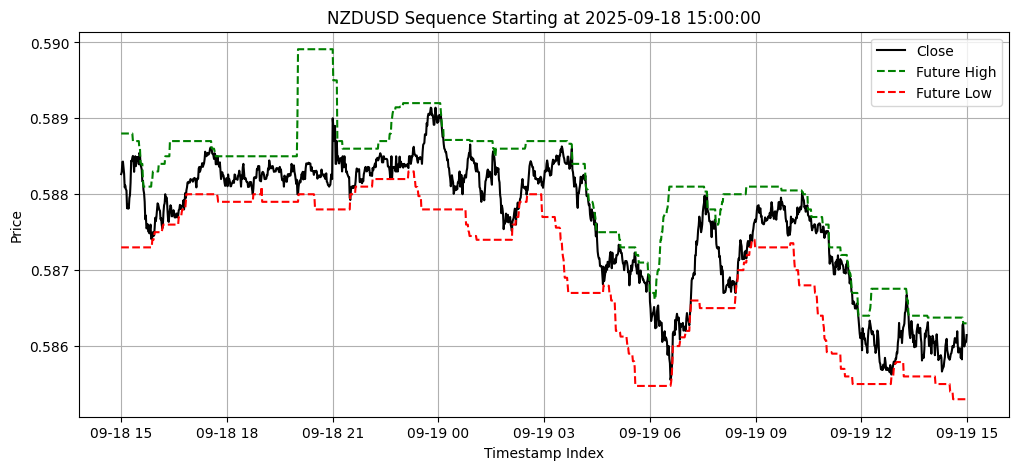

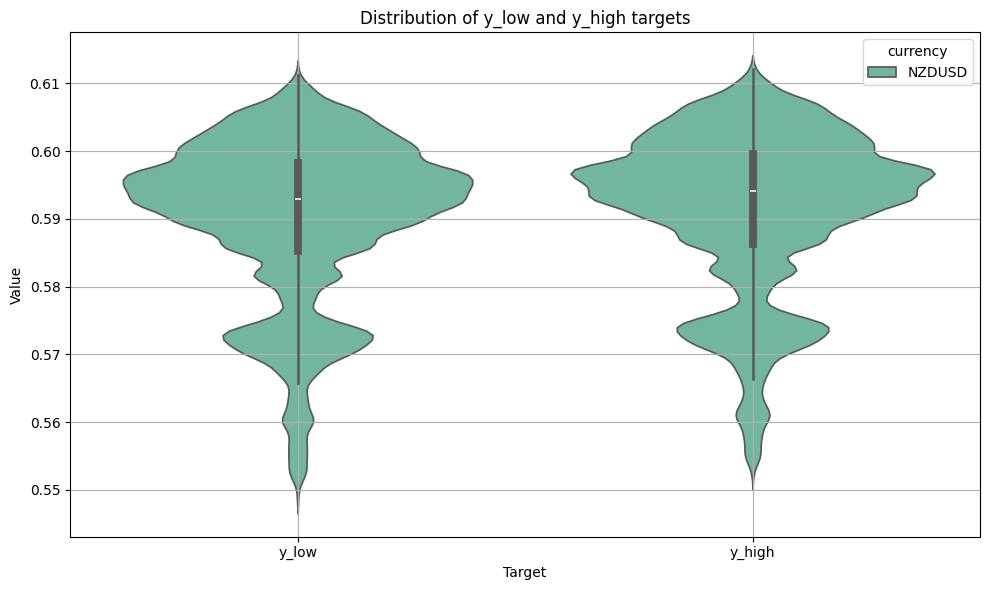

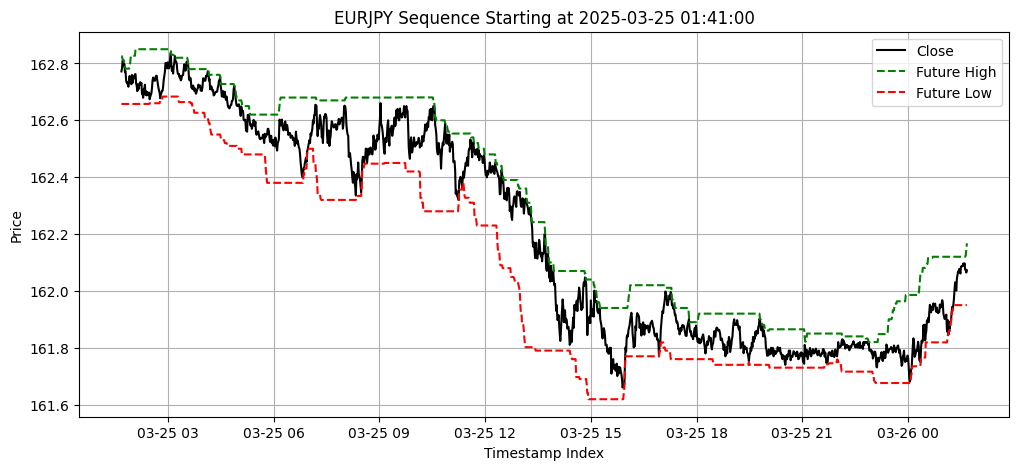

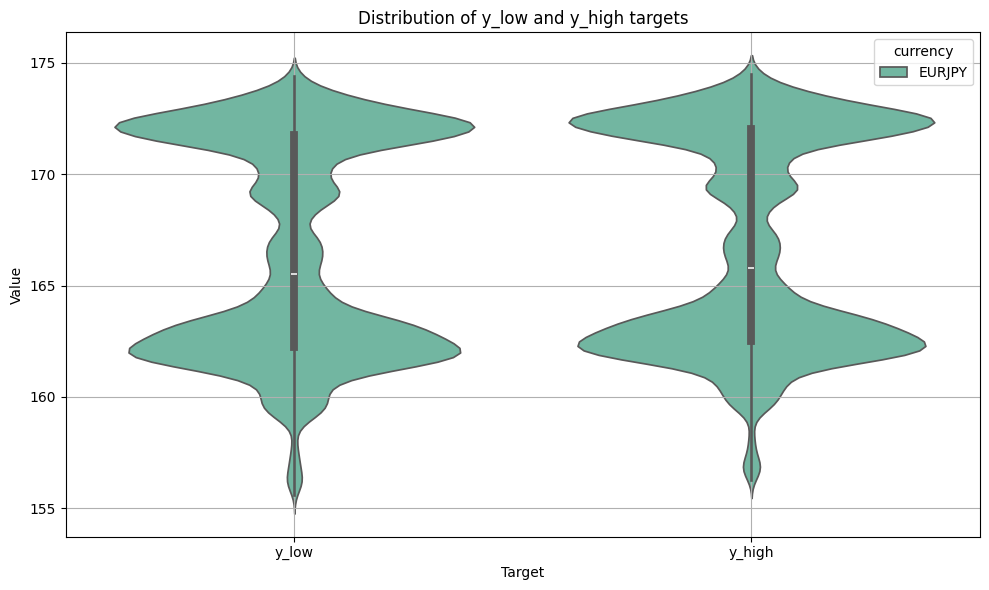

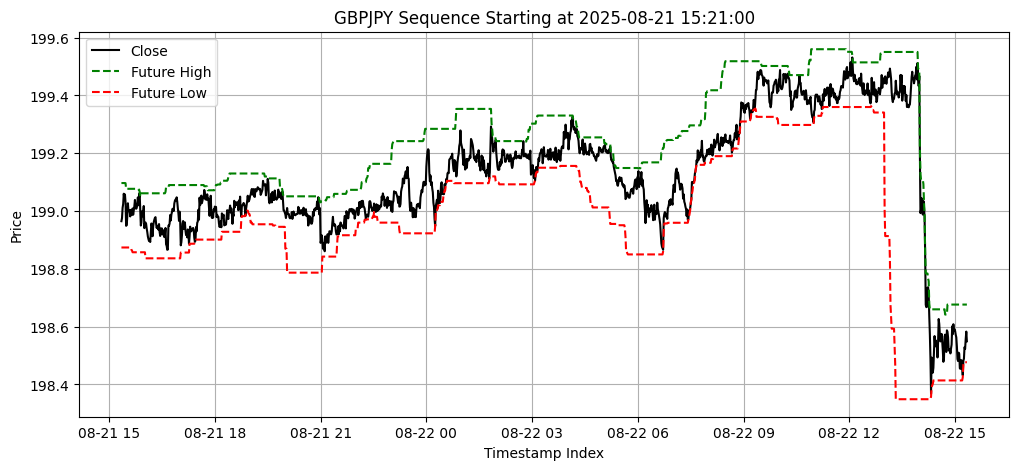

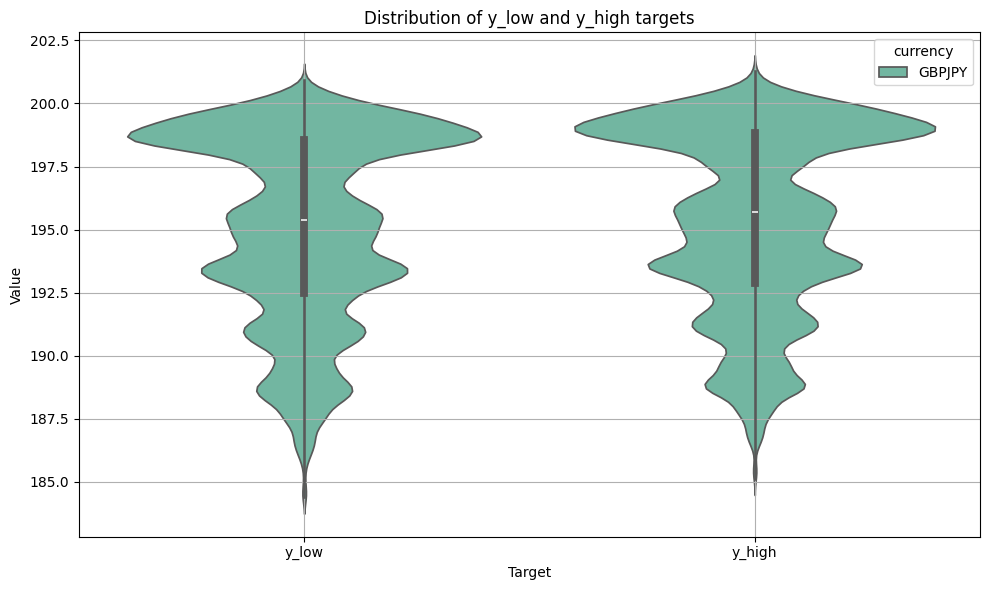

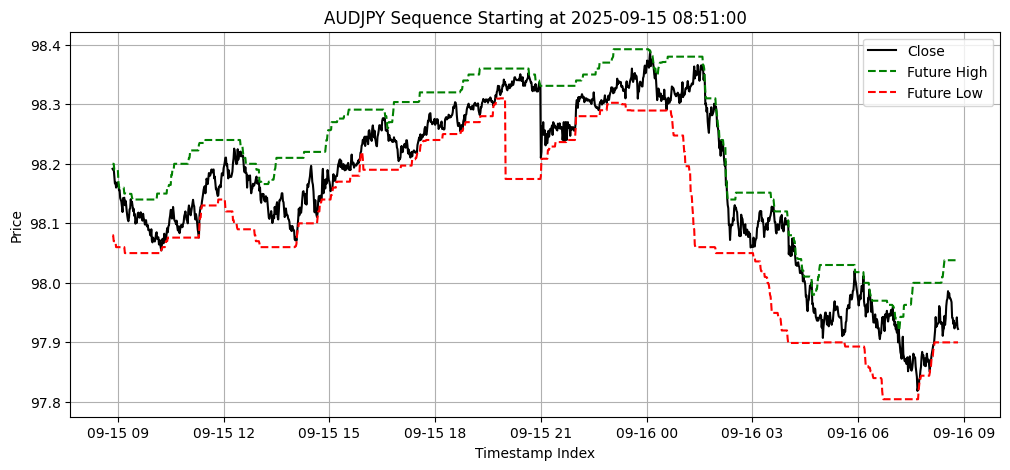

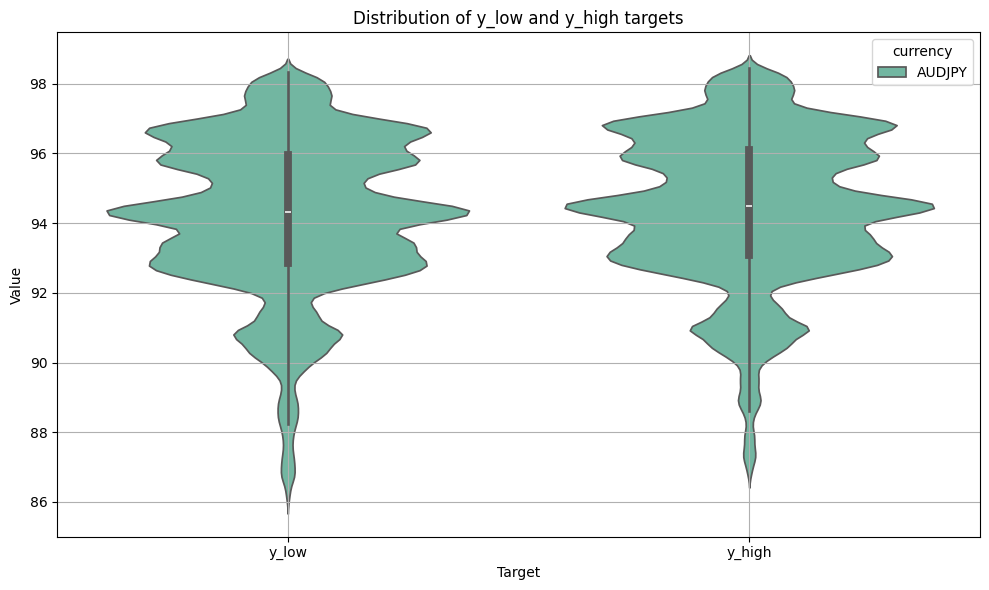

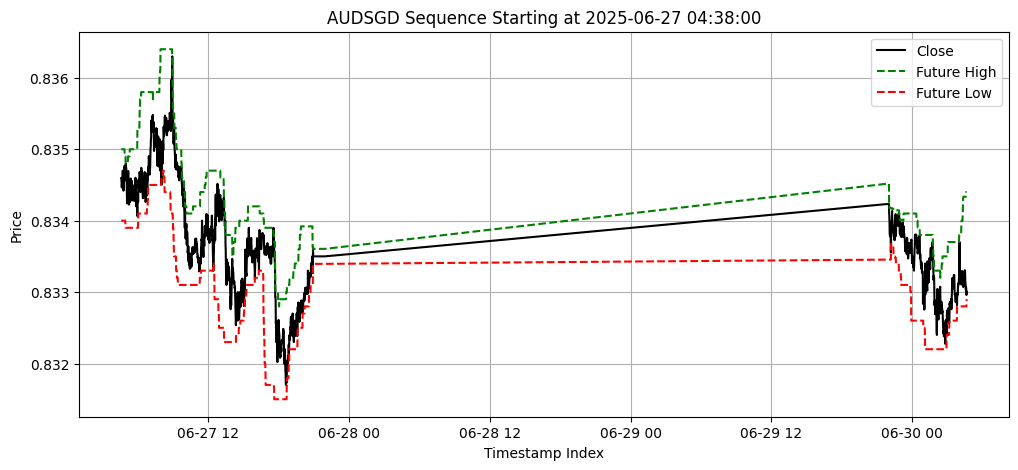

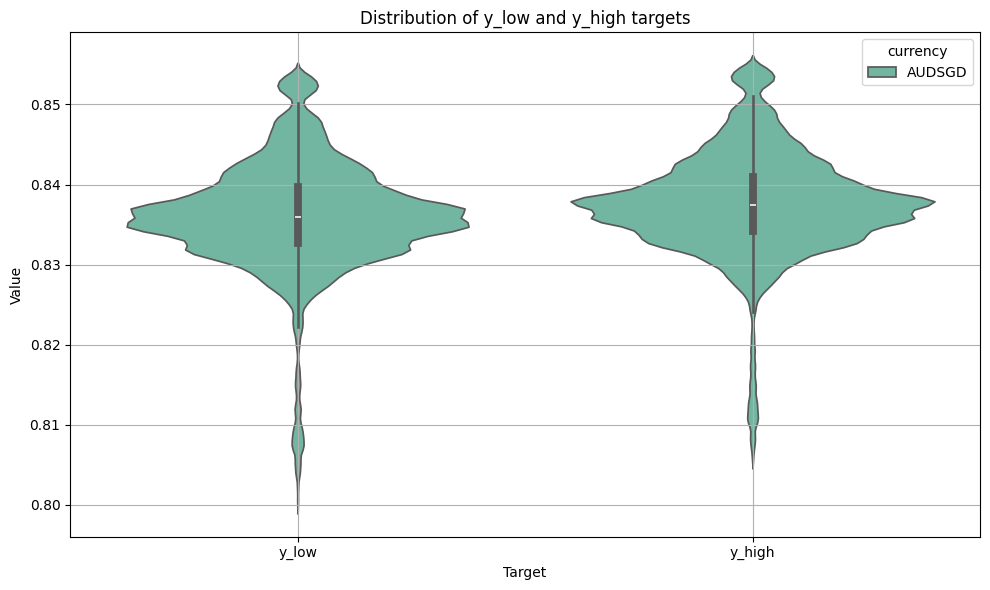

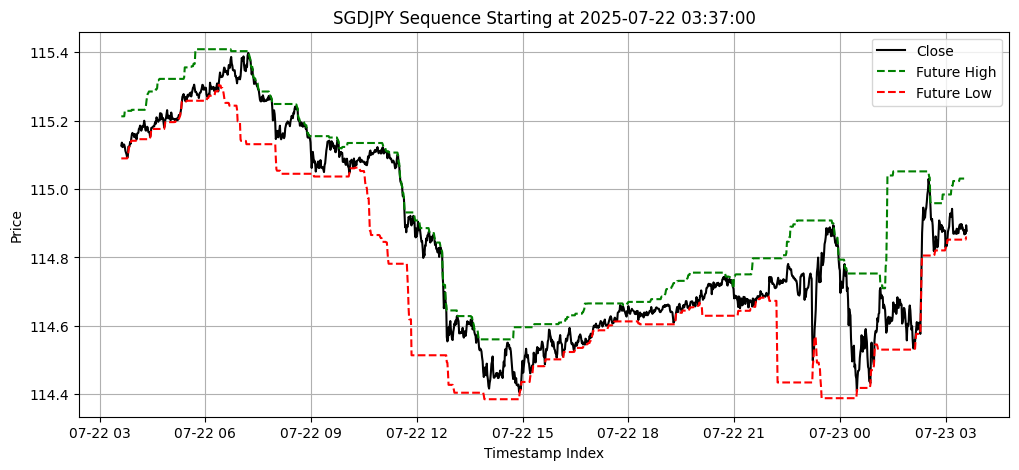

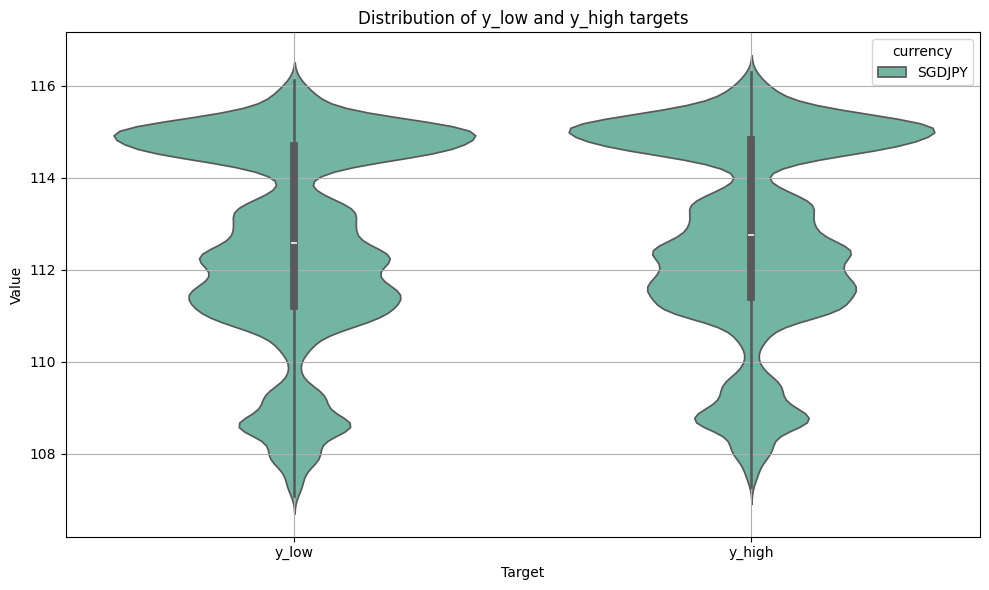

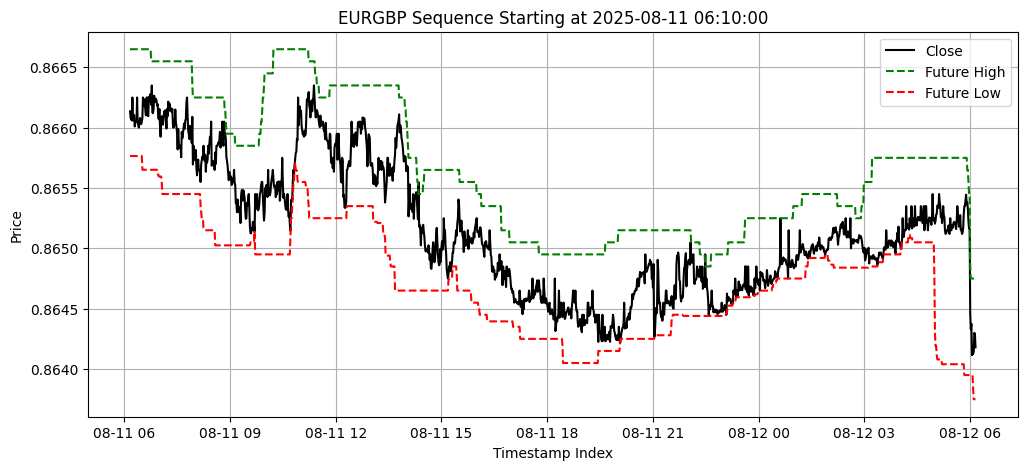

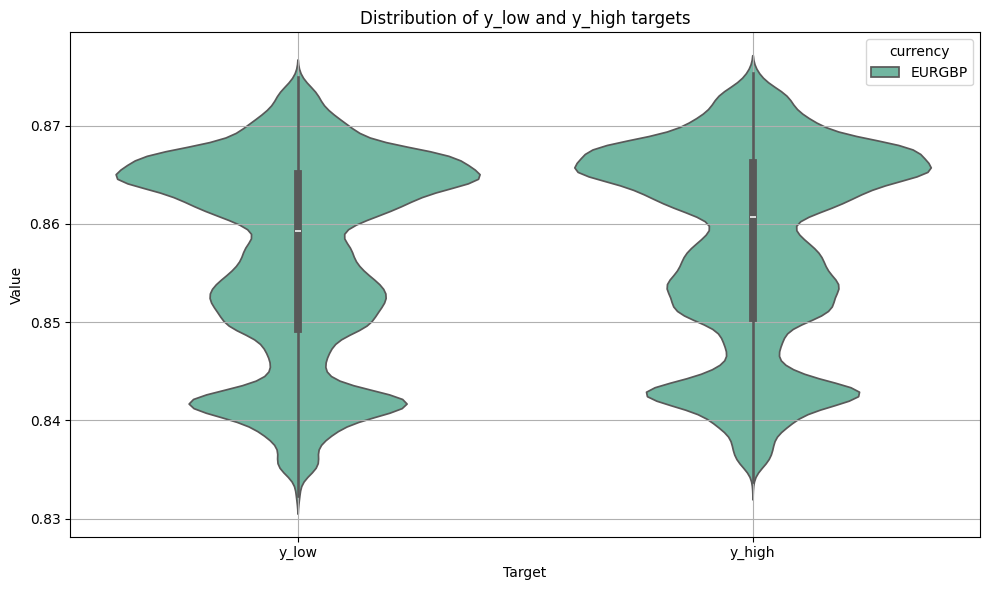

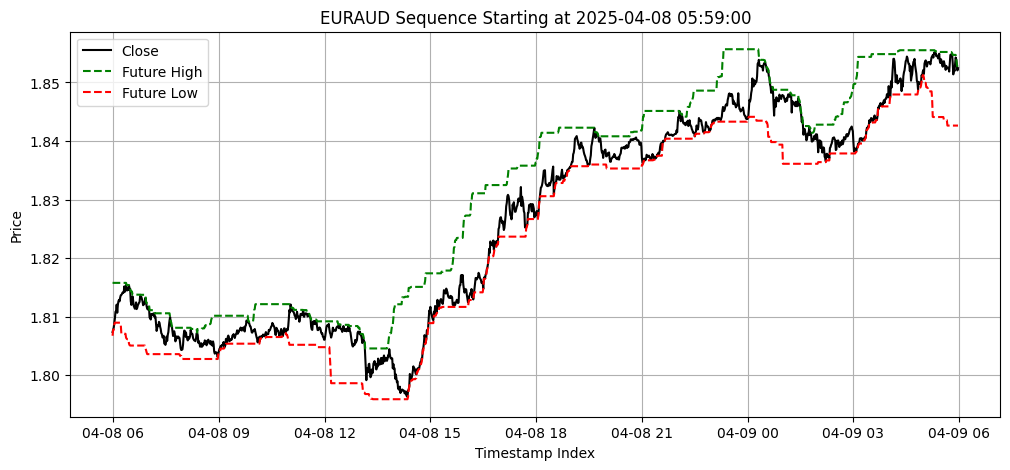

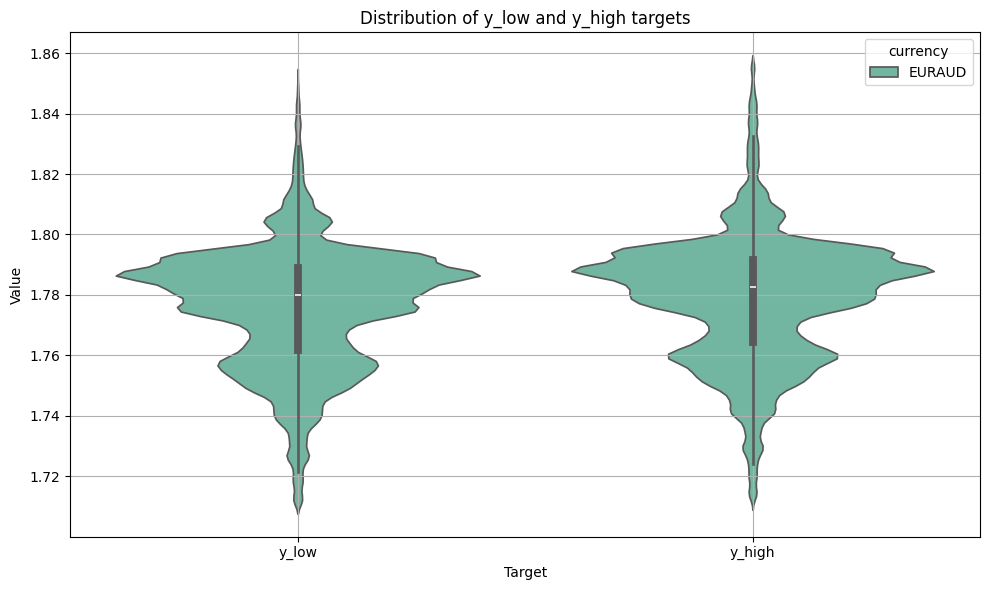

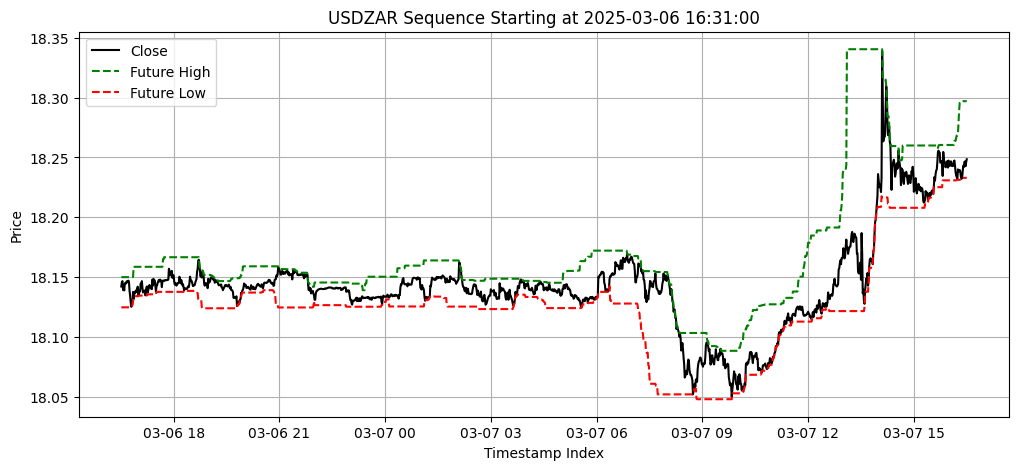

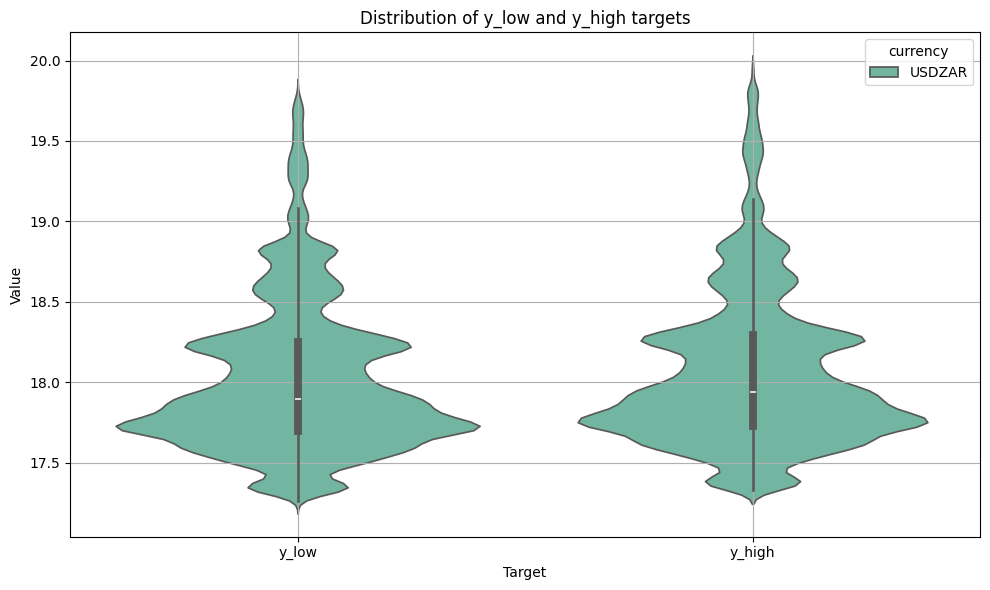

In [4]:
viz = LabelingVisualizer(df_labeled)
for curr in df_labeled["currency"].unique():

    viz.plot_sample_sequences_with_barriers(currency=curr, horizon=1440, n_samples=1)

    viz.plot_violin_targets(currencies=[curr])

The time series plots show that the computed high and low targets appropriately envelope the close price series, confirming that target computation approach behaves as expected. Additionally, violin plots of the target ranges across currencies indicate consistent distributions, with no extreme outliers. Now we save our labeled dataset for the upcoming tasks.

In [5]:
df_labeled.to_parquet("data/processed/labeled_data.parquet", index=False)

Now that the targets are defined, we can move on to feature engineering, including stationarization and orthogonalization techniques to reduce redundancy and improve model performance. Explore these transformations in [→ Notebook 03 – Feature Engineering](03_feature_engineering.ipynb).